In [34]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 実行上問題ない注意は非表示にする

%matplotlib inline

In [35]:
data_dir = "./"
data = pd.read_csv(data_dir + "USDJPY_d.csv")
data = data.copy()[6040:]# FXデータの読み込み（データは同じリポジトリのdataフォルダに入っています）
data.head() # データの概要を見てみます

,Date,Open,High,Low,Close
6040,1995-01-02,99.55,100.40,99.55,100.14
6041,1995-01-03,100.21,100.68,100.00,100.65
6042,1995-01-04,100.65,101.45,100.55,101.31
6043,1995-01-05,101.31,101.35,100.75,100.90
6044,1995-01-06,100.85,101.39,100.80,101.30


In [36]:
data2 = np.array(data)

In [37]:
# 5日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 5
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float) # pythonは0番目からindexが始まります
    data2[i,5] = np.mean(tmp)

In [38]:
# 25日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))]
ave_day = 25
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,6] = np.mean(tmp)

# 75日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 75
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,7] = np.mean(tmp)
    
# 200日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 200
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,8] = np.mean(tmp)


In [39]:
# 一目均衡表を追加します (9,26,52) 
para1 =9
para2 = 26
para3 = 52

# 転換線 = （過去(para1)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
for i in range(para1, len(data2)):
    tmp_high =data2[i-para1+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para1+1:i+1,3].astype(np.float)
    data2[i,9] = (np.max(tmp_high) + np.min(tmp_low)) / 2 
    
# 基準線 = （過去(para2)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para2, len(data2)):
    tmp_high =data2[i-para2+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para2+1:i+1,3].astype(np.float)
    data2[i,10] = (np.max(tmp_high) + np.min(tmp_low)) / 2 

# 先行スパン1 = ｛ （転換値+基準値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(0, len(data2)-para2):
    tmp =(data2[i,9] + data2[i,10]) / 2 
    data2[i+para2,11] = tmp


# 先行スパン2 = ｛ （過去(para3)日間の高値+安値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para3, len(data2)-para2):
    tmp_high =data2[i-para3+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para3+1:i+1,3].astype(np.float)
    data2[i+para2,12] = (np.max(tmp_high) + np.min(tmp_low)) / 2

In [40]:
# 25日ボリンジャーバンド（±1, 2シグマ）を追加します
parab = 25
data2 = np.c_[data2, np.zeros((len(data2),4))] # 列の追加
for i in range(parab, len(data2)):
    tmp = data2[i-parab+1:i+1,4].astype(np.float)
    data2[i,13] = np.mean(tmp) + 1.0* np.std(tmp) 
    data2[i,14] = np.mean(tmp) - 1.0* np.std(tmp) 
    data2[i,15] = np.mean(tmp) + 2.0* np.std(tmp) 
    data2[i,16] = np.mean(tmp) - 2.0* np.std(tmp)

In [41]:
# データの内容を見ます
data_show=pd.DataFrame(data2)
data_show

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1995-01-02,99.55,100.4,99.55,100.14,0,0,0,0,0,0,0,0,0,0,0,0
1,1995-01-03,100.21,100.68,100,100.65,0,0,0,0,0,0,0,0,0,0,0,0
2,1995-01-04,100.65,101.45,100.55,101.31,0,0,0,0,0,0,0,0,0,0,0,0
3,1995-01-05,101.31,101.35,100.75,100.9,0,0,0,0,0,0,0,0,0,0,0,0
4,1995-01-06,100.85,101.39,100.8,101.3,0,0,0,0,0,0,0,0,0,0,0,0
5,1995-01-09,101.25,101.35,99.6,99.92,100.816,0,0,0,0,0,0,0,0,0,0,0
6,1995-01-10,99.96,100.43,99.8,100.06,100.698,0,0,0,0,0,0,0,0,0,0,0
7,1995-01-11,100,100.2,99.45,99.99,100.434,0,0,0,0,0,0,0,0,0,0,0
8,1995-01-12,100.06,100.18,98.57,98.62,99.978,0,0,0,0,0,0,0,0,0,0,0
9,1995-01-13,98.7,99.07,98.25,98.55,99.428,0,0,0,99.85,0,0,0,0,0,0,0


In [42]:
# 説明変数となる行列Xを作成します
day_ago = 25 # 何日前までのデータを使用するのかを設定
num_sihyou = 1 + 4 + 4 +4 # 終値1本、MVave4本、itimoku4本、ボリンジャー4本

X = np.zeros((len(data2), day_ago*num_sihyou)) 

for s in range(0, num_sihyou): # 日にちごとに横向きに並べる
    for i in range(0, day_ago):
        X[i:len(data2),day_ago*s+i] = data2[0:len(data2)-i,s+4]

In [43]:
# 被説明変数となる Y = pre_day後の終値-当日終値 を作成します
Y = np.zeros(len(data2))

# 何日後を値段の差を予測するのか決めます
pre_day = 1
for i in range(len(Y)-pre_day):
    if X[pre_day + i,0] - X[i,0] >= 0:
        Y[i] = 1
    else:
        Y[i] = -1
# Y[0:len(Y)-pre_day] = X[pre_day:len(X),0] - X[0:len(X)-pre_day,0]

In [44]:
# 【重要】X, Yを正規化します
original_X = np.copy(X) # コピーするときは、そのままイコールではダメ
tmp_mean = np.zeros(len(X))

for i in range(day_ago,len(X)):
    tmp_mean[i] = np.mean(original_X[i-day_ago+1:i+1,0]) # 25日分の平均値
    for j in range(0, X.shape[1]): 
        X[i,j] = (X[i,j] - tmp_mean[i]) # Xを正規化
    Y[i] =  Y[i] # X同士の引き算しているので、Yはそのまま

In [45]:
# XとYを学習データとテストデータ(2017年～)に分ける
X_train = X[200:5450,:] # 200日平均を使うので、それ以降を学習データに使用します
Y_train = Y[200:5450] 

X_test = X[5450:len(X)-pre_day-650,:]
Y_test = Y[5450:len(Y)-pre_day-650]

In [46]:
def benefit():
    sum = 0
    for i in range(len(Y_pred)-1):
        if Y_pred[i] >= 0:
            sum += X_test[i+1, 0] - X_test[i, 0]
        else:
            sum += X_test[i, 0] - X_test[i+1, 0]            
    return sum

In [47]:
def draw_benefit():
    total_return = np.zeros(len(Y_test)-1)

    if Y_pred[0] >=0: 
        total_return[0] = X_test[1, 0] - X_test[0, 0]
    else:
        total_return[0] = X_test[0, 0] - X_test[1, 0]

    for i in range(len(Y_pred)-1):
        if Y_pred[i] >=0:
            total_return[i] = total_return[i-1] + X_test[i+1, 0] - X_test[i, 0]
        else:
            total_return[i] = total_return[i-1] + X_test[i, 0] - X_test[i+1, 0]

    plt.plot(total_return)

In [48]:
# 学習データを使用して、線形回帰モデルを作成します
from sklearn import linear_model # scikit-learnライブラリの関数を使用します
linear_reg_model = linear_model.LinearRegression()

linear_reg_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

print("回帰式モデルの係数")
print(linear_reg_model.intercept_) 
print(linear_reg_model.coef_)

回帰式モデルの係数
0.0129397216070266
[-2.62634551e+10 -3.69787426e+10 -8.24399459e+10 -3.73018482e+10
 -5.00571936e+10 -2.93392915e+10 -3.20861487e+10 -4.46588125e+10
 -4.37695225e+10 -4.63309079e+10 -4.86382755e+10 -4.50477675e+10
 -4.12838438e+10 -4.31997881e+10 -3.98027256e+10 -4.21571520e+10
 -4.29490639e+10 -3.95171514e+10 -4.32755380e+10 -4.78177937e+10
 -5.20387609e+10 -4.13752122e+10  9.46281877e+09 -3.08902382e+10
 -1.44283141e+10  2.94615552e+10 -5.84540530e+10 -1.05718313e+11
 -5.36371593e+10 -5.97778285e+10 -7.41279555e+10 -4.47197667e+10
 -4.28549941e+10 -5.80836095e+10 -4.69709013e+10 -6.25911178e+10
 -6.26723063e+10 -6.16746128e+10 -4.85038883e+10 -6.39562134e+10
 -5.08189860e+10 -5.87127470e+10 -7.88341749e+10 -2.97119555e+10
 -4.12449349e+10 -2.97141500e+10 -1.12030491e+11 -3.33024330e+11
  1.72053329e+11 -1.23554555e+11 -3.43959872e+09  1.02520263e+11
  3.55932595e+11 -1.75735768e+11  1.26595955e+11 -6.29054983e+09
 -4.92015892e+07 -4.12199441e+09  5.13835089e+09 -1.83667405e

In [49]:
Y_pred = linear_reg_model.predict(X_test) # 予測する


# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(linear_reg_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(linear_reg_model.score(X_test, Y_test)))
print("Benefit: {:.3f}".format(benefit()))

予測日数：189、正解日数：105、正解率：55.55555555555556
Training score: 0.046
Test score: -0.015
Benefit: 7.914


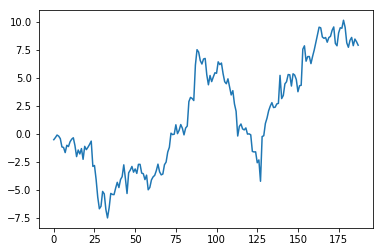

In [50]:
draw_benefit()

In [51]:
# 学習データを使用して、線形回帰モデルを作成します
from sklearn.linear_model import LogisticRegression # scikit-learnライブラリの関数を使用します
logistic_regression_model = linear_model.LogisticRegression()

logistic_regression_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
Y_pred = logistic_regression_model.predict(X_test) # 予測する

# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(logistic_regression_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(logistic_regression_model.score(X_test, Y_test)))
print("Benefit: {:.3f}".format(benefit()))

予測日数：189、正解日数：106、正解率：56.08465608465608
Training score: 0.581
Test score: 0.561
Benefit: 12.788


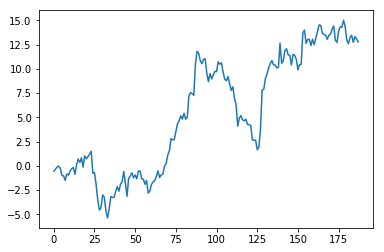

In [53]:
draw_benefit()

In [54]:
from sklearn.tree import DecisionTreeClassifier # scikit-learnライブラリの関数を使用します
tree_model = DecisionTreeClassifier(max_depth = 14)

tree_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
Y_pred = tree_model.predict(X_test) # 予測する

# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(tree_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(tree_model.score(X_test, Y_test)))
print("Benefit: {:.3f}".format(benefit()))

予測日数：189、正解日数：97、正解率：51.32275132275132
Training score: 0.586
Test score: 0.513
Benefit: 3.777


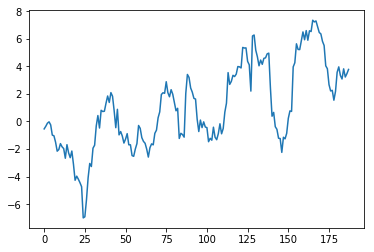

In [56]:
draw_benefit()

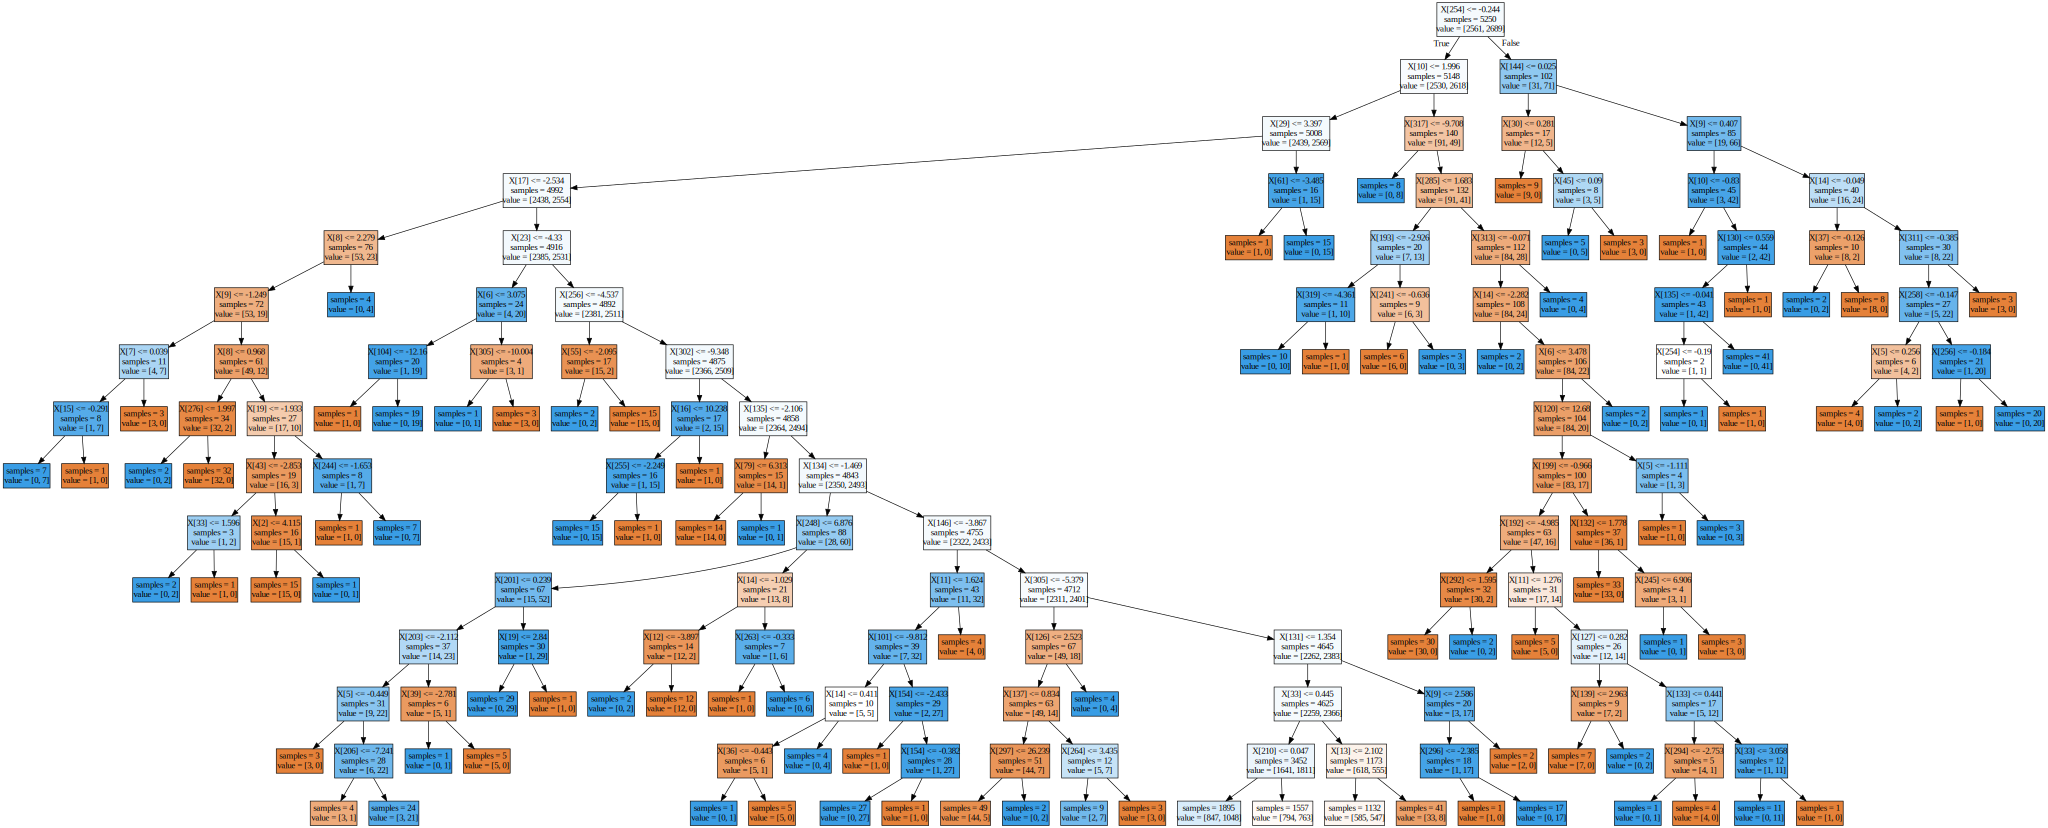

In [57]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file="tree_model.dot", impurity = False, filled=True)

import graphviz
with open("tree_model.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Text(0,0.5,'Feature')

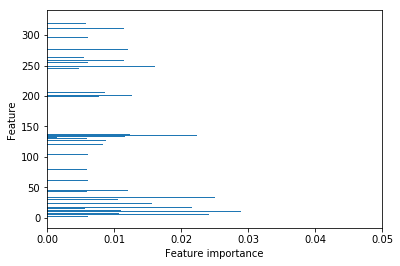

In [58]:
n_features = X.shape[1]
plt.barh(range(n_features), tree_model.feature_importances_, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [59]:
from sklearn.ensemble import RandomForestClassifier # scikit-learnライブラリの関数を使用します
forest_model = RandomForestClassifier(n_estimators=5, max_depth=5)

forest_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
Y_pred = forest_model.predict(X_test) # 予測する


# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(forest_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(forest_model.score(X_test, Y_test)))
print("Benefit: {:.3f}".format(benefit()))

予測日数：189、正解日数：92、正解率：48.67724867724868
Training score: 0.594
Test score: 0.487
Benefit: -5.932


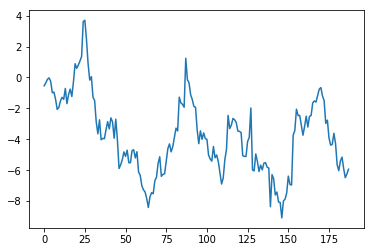

In [61]:
draw_benefit()

Text(0,0.5,'Feature')

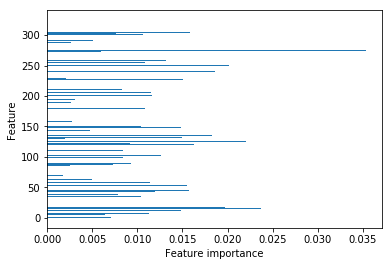

In [62]:
n_features = X.shape[1]
plt.barh(range(n_features), forest_model.feature_importances_, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt_model = GradientBoostingClassifier()
gbrt_model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [64]:
Y_pred = gbrt_model.predict(X_test) # 予測する

# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

print("Training score: {:.3f}".format(gbrt_model.score(X_train, Y_train)))
print("Test score: {:.3f}".format(gbrt_model.score(X_test, Y_test)))
print("Benefit: {:.3f}".format(benefit()))

予測日数：189、正解日数：92、正解率：48.67724867724868
Training score: 0.771
Test score: 0.487
Benefit: -1.452


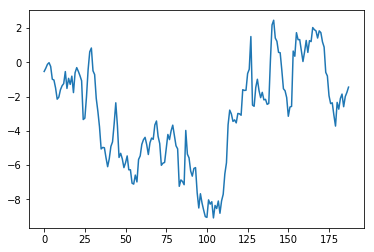

In [65]:
draw_benefit()

Text(0,0.5,'Feature')

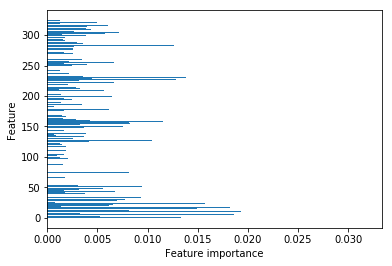

In [66]:
n_features = X.shape[1]
plt.barh(range(n_features), gbrt_model.feature_importances_, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")